In [580]:
# risk calculation tool

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def attack(n_att, n_def):
    """ Simulate an attack recursively """
    dice_att = sorted(roll_tha_dice(min(3, n_att)), reverse=True)
    dice_def = sorted(roll_tha_dice(min(2, n_def)), reverse=True) 
    
    dice_att = dice_att[0:min(2, n_def)] # get number of dice used for attacker
    dice_def = dice_def[0:min(2, n_att)] # get number of dice used for defender

    dice_diff = (np.array(dice_def) - np.array(dice_att)) >= 0 # defender wins
    
    n_att = n_att - sum(dice_diff) # update number of attackers/defenders
    n_def = n_def - (len(dice_diff) - sum(dice_diff))
        
    if n_att > 0 and n_def > 0: 
        n_att, n_def = attack(n_att, n_def)

    return (n_att, n_def)

def simulate_attack(n_att, n_def, iterations=5000):
    """ Simulate attack iterations time, Monte Carlo Simulation"""
    n_att_lst = []
    n_def_lst = []

    for i in range(0, iterations):
        n_att_, n_def_ = attack(n_att, n_def)
        n_att_lst.append(n_att_)
        n_def_lst.append(n_def_)

    # all iterations
    n_att = np.array(n_att_lst)
    n_def = np.array(n_def_lst)
    
    avg_att = n_att.mean()
    avg_def = n_def.mean()

    wins = sum(n_att>0)/iterations

    return (wins, avg_att, avg_def)

# helper funcs
def print_summ(wins, avg_att, avg_def):
    print("Prob of winning: \t", wins)
    print("Avg attackers left: \t", avg_att)
    print("Avg defenders left: \t", avg_def)

def roll_die():
    return (1 + np.random.randint(6))

def roll_tha_dice(n=1):
    if n<1: 
        return (-999)
    dice = []
    for i in range(0,n):
        dice.append(roll_die())
    return (dice)

def mod_df(df, grid):
    df.columns = grid
    df["defenders"] = grid
    df = df.set_index("defenders")
    df = round(df, 2)
    return(df)

### Calculate a single attack/defend combination

In [581]:
wins, avg_att, avg_def = simulate_attack(n_att=12, n_def=8)
print_summ(wins, avg_att, avg_def)

Prob of winning: 	 0.8536
Avg attackers left: 	 5.6902
Avg defenders left: 	 0.4432


### Calculate multiple probabiity combinations in a grid fashion

If grid and iterations are large, this can take a lot of time as each attack (grid x grid) is performed iterations time. Total complexity is grid x grid x iterations.

In [585]:
# setting up a gridspace
from_ = 1
to_ = 10
every = 1

# initialization 
grid = np.append(np.arange(from_, to_, every).astype(int), to_)
len_ = len(grid)
res_mat_wins = np.zeros((len_, len_))
res_mat_avg_att = np.zeros((len_, len_))
res_mat_avg_def = np.zeros((len_, len_))

# calculation
for i in range(0, len_):
    for j in range(0, len_):
        wins, avg_att, avg_def = simulate_attack(int(grid[i]),int(grid[j]), 3000)
        res_mat_wins[i,j] = wins
        res_mat_avg_att[i,j] = avg_att
        res_mat_avg_def[i,j] = avg_def
    
# post processing 
res_mat_wins = res_mat_wins.T
res_mat_avg_att = res_mat_avg_att.T
res_mat_avg_def = res_mat_avg_def.T

df_wins = pd.DataFrame(res_mat_wins)
df_wins = mod_df(df_wins, grid)
df_avg_att = pd.DataFrame(res_mat_avg_att)
df_avg_att = mod_df(df_avg_att, grid)
df_avg_def = pd.DataFrame(res_mat_avg_def)
df_avg_def = mod_df(df_avg_def, grid)

In [586]:
df_wins

,1,2,3,4,5,6,7,8,9,10
defenders,,,,,,,,,,
1,0.44,0.76,0.91,0.97,0.99,1.00,1.00,1.00,1.00,1.00
2,0.11,0.38,0.66,0.78,0.89,0.93,0.97,0.98,0.99,1.00
3,0.03,0.20,0.47,0.63,0.78,0.85,0.90,0.95,0.97,0.98
4,0.01,0.09,0.32,0.49,0.64,0.74,0.83,0.89,0.93,0.95
5,0.00,0.05,0.20,0.35,0.50,0.65,0.74,0.82,0.87,0.91
6,0.00,0.02,0.13,0.26,0.39,0.52,0.63,0.72,0.81,0.86
7,0.00,0.01,0.08,0.18,0.31,0.42,0.54,0.64,0.72,0.80
8,0.00,0.00,0.06,0.11,0.23,0.33,0.45,0.54,0.64,0.73
9,0.00,0.00,0.03,0.10,0.17,0.26,0.35,0.46,0.56,0.64


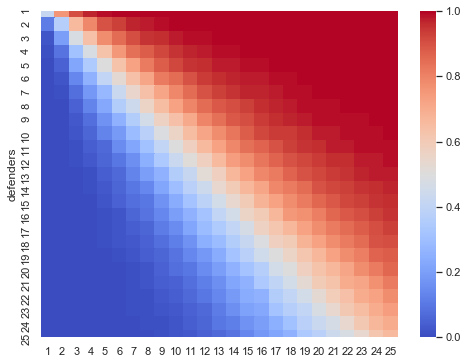

In [583]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_wins, cmap='coolwarm', center = 0.5)

In [584]:
df_wins

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
defenders,,,,,,,,,,,,,,,,,,,,,
1,0.42,0.76,0.91,0.97,0.99,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.11,0.37,0.66,0.79,0.90,0.93,0.97,0.98,0.99,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,0.02,0.20,0.48,0.64,0.78,0.85,0.91,0.95,0.96,0.98,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,0.01,0.09,0.31,0.48,0.63,0.75,0.84,0.88,0.92,0.95,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,0.00,0.05,0.22,0.35,0.50,0.63,0.73,0.82,0.88,0.92,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
6,0.00,0.02,0.14,0.26,0.41,0.53,0.64,0.72,0.82,0.85,...,0.98,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,0.00,0.01,0.08,0.18,0.28,0.43,0.55,0.64,0.72,0.79,...,0.97,0.98,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00
8,0.00,0.00,0.05,0.13,0.23,0.36,0.44,0.56,0.65,0.73,...,0.96,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00
9,0.00,0.00,0.03,0.08,0.17,0.26,0.36,0.46,0.57,0.64,...,0.94,0.96,0.97,0.98,0.99,0.99,0.99,0.99,1.00,1.00
